In [2]:
import glacierml as gl
import matplotlib.pyplot as plt
import imageio
import numpy as np
from tqdm import tqdm
import pandas as pd

2023-10-20 14:16:10.321677: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-20 14:16:10.366908: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-20 14:16:10.950524: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# How well do coregistrations sample RGI in percent difference decimal
cs1 = gl.sample_coregistration_data('1')
cs2 = gl.sample_coregistration_data('2')
cs3 = gl.sample_coregistration_data('3')
cs4 = gl.sample_coregistration_data('4')
cs=[cs1,cs2,cs3,cs4]
pd.concat(cs,keys= ['1','2','3','4'],axis=0)

Area (km$^2$) Max Length (m) Slope (deg) Min Elevation (m)
1 mean        9.921648       2.394871   -0.276771         -0.284741
  median      7.992063       2.680851   -0.276371         -0.119861
  min              0.1           -0.0        -1.0              -0.0
  max        -0.632321      -0.580417   -0.448354         -0.251049
  IQR         6.328012       2.038878   -0.267857         -0.378011
  STD           3.0074       1.632239   -0.187626         -0.307101
2 mean        1.455891       1.893697   -0.303043         -0.262563
  median      9.595238        3.13617     -0.2827         -0.095122
  min              4.6     -43.555556   -1.733333              -1.0
  max        -0.968878      -0.787058    -0.61521         -0.267445
  IQR         5.113208       1.532726   -0.323661         -0.596888
  STD        -0.511031       0.550624   -0.333018           -0.3501
3 mean         2.12159       1.844263   -0.307075         -0.239993
  median      8.769841       3.011348   -0.303797         -0.093031
  min              4.6     -43.555556        -1.5              -1.0
  max        -0.932072      -0.787058    -0.61521         -0.251049
  IQR         5.078374       1.382136   -0.410714         -0.642219
  STD        -0.168654       0.520145   -0.358808         -0.366027
4 mean        5.017702       1.935907    -0.29157          -0.23895
  median      8.325397       2.848227   -0.291139         -0.095122
  min              1.9     -12.111111        -1.4              -1.0
  max        -0.632321      -0.787058   -0.448354         -0.251049
  IQR         5.471698       1.568898   -0.366071         -0.618403
  STD         2.058613       0.670587   -0.290429          -0.35626

In [4]:
rs = {}
for a in range(1,5,1):
    
    dictlist = {}
    tr = gl.coregister_data(str(a))
    for k in tqdm(range(0,500,1)):
        dfts = gl.sample_training_data(tr,k)

        dictlist[k] = dfts
    df = pd.DataFrame.from_dict({(i,j): dictlist[i][j] 
                               for i in dictlist.keys()
                               for j in dictlist[i].keys()},
                           orient='index')
    

    mean_area = []
    for i in range(0,500,1):
        mean_area.append(df.T[i]['Area']['mean'])

    mean_area = pd.DataFrame(mean_area)
    rs[a] = (mean_area[abs(mean_area[0]) == mean_area[0].abs().min()].index[0])
    print(f'The best random state for sampling coregistration {a} is {rs[a]}')

100%|██████████| 500/500 [00:05<00:00, 95.03it/s]


The best random state for sampling coregistration 1 is 209


100%|██████████| 500/500 [00:04<00:00, 102.27it/s]


The best random state for sampling coregistration 2 is 370


100%|██████████| 500/500 [00:04<00:00, 101.51it/s]


The best random state for sampling coregistration 3 is 367


100%|██████████| 500/500 [00:04<00:00, 101.13it/s]


The best random state for sampling coregistration 4 is 323


/tmp/ipykernel_3863957/2506031803.py:75: RuntimeWarning: invalid value encountered in log10
  bins=np.logspace(np.log10(x.min()), np.log10(x.max()), 15),


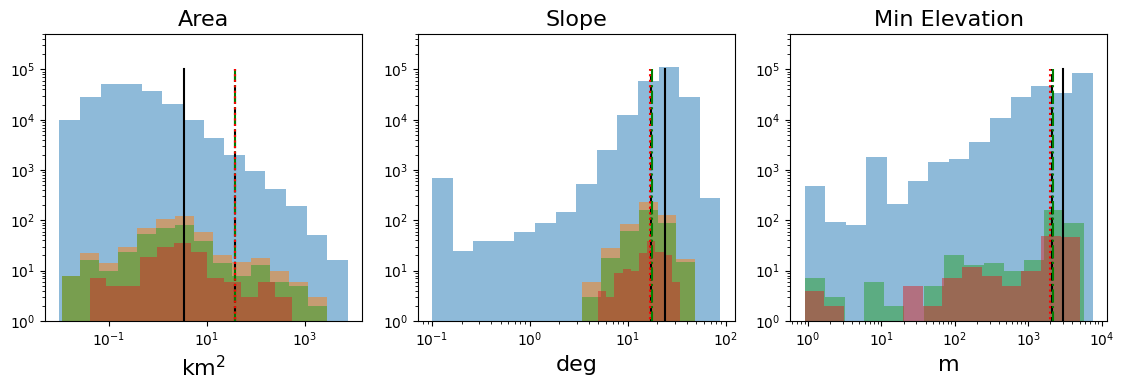

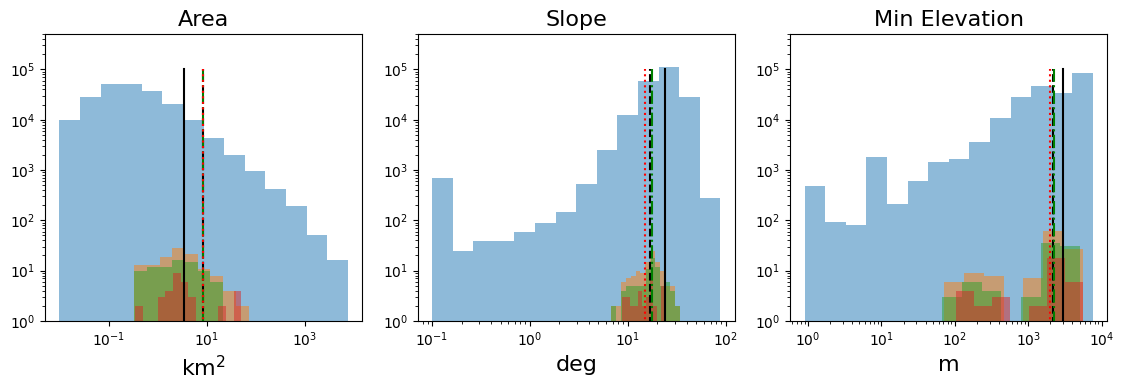

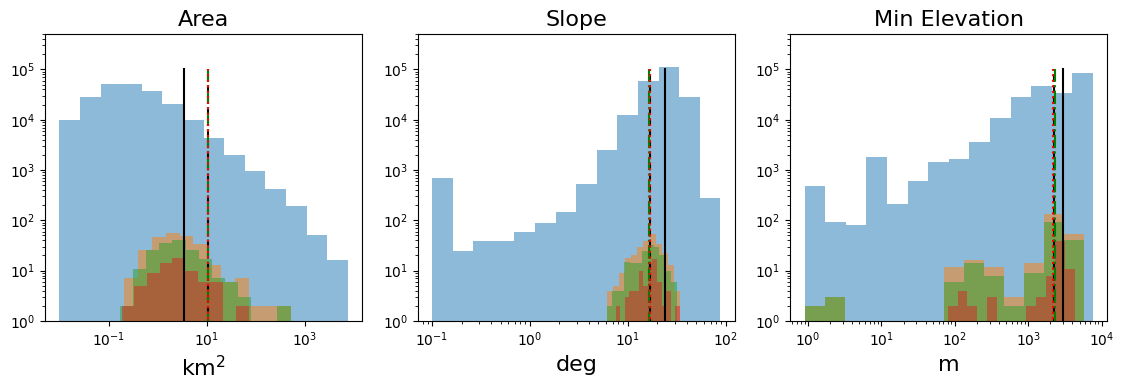

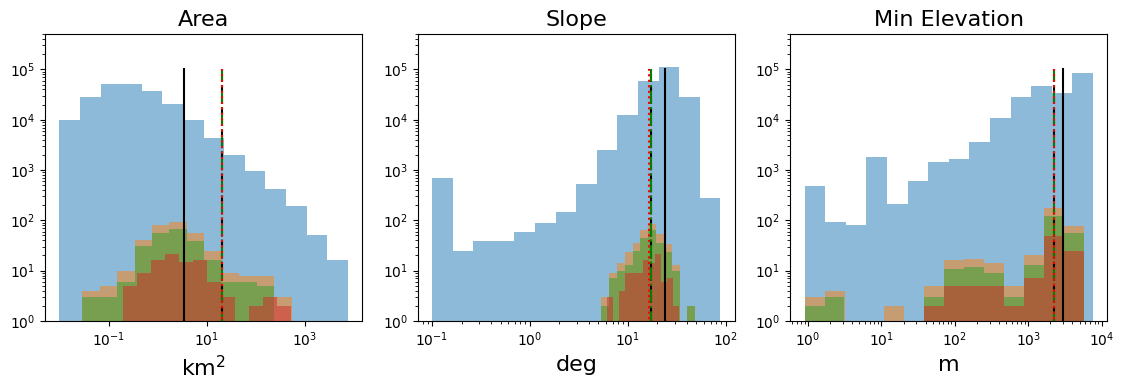

In [34]:
for c in range(1,5,1):
    if c == 1:
        rs = 209
    if c == 2:
        rs = 370
    if c == 3:
        rs = 367
    if c == 4:
        rs = 323
    p = str(c)
    train = gl.coregister_data(p)
#     if p == '4':
#         train = train.drop(train[train['Thickness'] >= 300].index)
#         train = train.drop(train[train['Thickness'] == 267].index)
#         train = train.drop(train[train['Thickness'] == train['Thickness'].min()].index)
    rgi = gl.load_RGI()
    trfeats, tefeats, trlabs, telabs = gl.split_data(train,rs)

    feat_list = ['Area','Slope','Zmin']
    fig = plt.figure(figsize = (15,4))
    for n,i in (enumerate(feat_list)):
        ax = plt.subplot(1,4,n+1)
    
        a = rgi[i]
        x = train[i]
        y = trfeats[i]
        z = tefeats[i]
        y[(y == -999)] = 0
        y[(y == -9)] = 25
        z[(z == -999)] = 0
        z[(z == -9)] = 25
        a[(a == -9)] = 25
        a[(a == -999)] = 0
        rmean = x.mean()
        tmean = y.mean()
        vmean = z.mean()
        fmean = a.mean()
        if i == 'Area':
            ax.set_title(i,fontsize = 16)
            ax.set_xlabel('km$^2$',fontsize = 16)

        if i == 'Slope':
            ax.set_title(i,fontsize = 16)
            ax.set_xlabel('deg',fontsize = 16)
            a = a + 0.1
            x = x + 0.1
            y = y + 0.1
            z = z + 0.1
        if i == 'Zmin':
            ax.set_xlabel('m',fontsize = 16)
            ax.set_title('Min Elevation',fontsize = 16)
            x = x + 0.9
            y = y + 0.9
            z = z + 0.9
            a = a + 0.9


        plt.hist(
            a, 
            bins=np.logspace(np.log10(a.min()), np.log10(a.max()), 15), 
            log = True, label = 'RGI Data',alpha = 0.5
        )
        plt.plot(
            (fmean,fmean),
            (0,1e5),
            c = 'k',
            linestyle = 'solid',
            label = 'RGI Mean'
        )



        plt.hist(
            x, 
            bins=np.logspace(np.log10(x.min()), np.log10(x.max()), 15), 
            log = True, label = 'Coregistered Data',alpha = 0.5
        )
        plt.plot(
            (rmean,rmean),
            (0,1e5),
            c = 'k',
            linestyle = 'dashed',
            label = 'Coregsitered Mean'
        )




        plt.hist(
            y, 
            bins=np.logspace(np.log10(y.min()), np.log10(y.max()), 15), 
            log = True, label = 'Training Data',alpha = 0.5
        )
        plt.plot(
            (tmean,tmean),
            (0,1e5),
            c = 'g',
            linestyle = 'dashdot',
            label = 'Train Mean'
        )


        plt.hist(
            z, 
            bins=np.logspace(np.log10(z.min()), np.log10(z.max()), 15), 
            log = True, label = 'Testing Data',alpha = 0.5
        )
        plt.plot(
            (vmean,vmean),
            (0,1e5),
            c = 'r',
            linestyle = 'dotted',
            label = 'Test Mean'
        )

        plt.ylim((1e0,500000))
    #             ax.set_title(i)
        plt.loglog()



#     plt.suptitle(
#          'Coregistration ' +p,
# #         p + ' Sampling' + '\nRandom State = ' + str(rs), 
#          fontsize = 16, y = .96
#     )
#     plt.legend(loc = 'upper left',
#     #             bbox_to_anchor=(0,0,1,2.1)
#     )

    plt.tight_layout()
    plt.show()

In [25]:
np.logspace(-1,2,4)

array([  0.1,   1. ,  10. , 100. ])

In [5]:
for c in range(1,5,1):
    dictlist1 = {}
    dictlist2 = {}
    dictlist3 = {}
    df = gl.coregister_data(str(c))
    df = df.drop('RGIId', axis = 1)
#     if c == 4:
#         df = df.drop(df[df['Thickness'] >= 300].index)
#         df = df.drop(df[df['Thickness'] == 267].index)
#         df = df.drop(df[df['Thickness'] == df['Thickness'].min()].index)
    for k in tqdm(range(0,500,1)):
        df_sampler = df.copy()
        df_trainer = df.copy()
        df1test = df_sampler.sample(frac = 0.333333333, random_state = k)
        df_sampler = df_sampler.drop(df1test.index)

        df2test = df_sampler.sample(frac = 0.5,random_state = k)
        df_sampler = df_sampler.drop(df2test.index)

        df3test = df_sampler

        df_1 = df_trainer.drop(df1test.index)
        df_2 = df_trainer.drop(df2test.index)
        df_3 = df_trainer.drop(df3test.index)
        diff1 = gl.sub_sample_training_data(df_1, df_2, k)

        diff2 = gl.sub_sample_training_data(df_2, df_3, k)

        diff3 = gl.sub_sample_training_data(df_1, df_3, k)

        dictlist1[k] = diff1
        dictlist2[k] = diff2
        dictlist3[k] = diff3
    df1 = pd.DataFrame.from_dict({(i,j): dictlist1[i][j] 
                               for i in dictlist1.keys()
                               for j in dictlist1[i].keys()},
                           orient='index')
    df2 = pd.DataFrame.from_dict({(i,j): dictlist2[i][j] 
                               for i in dictlist2.keys()
                               for j in dictlist2[i].keys()},
                           orient='index')
    df3 = pd.DataFrame.from_dict({(i,j): dictlist3[i][j] 
                               for i in dictlist3.keys()
                               for j in dictlist3[i].keys()},
                           orient='index')



    mean_area1 = []
    for i in range(0,500,1):
        mean_area1.append(df1.loc[i].T['Area']['mean'])

    mean_area2 = []
    for i in range(0,500,1):
        mean_area2.append(df2.loc[i].T['Area']['mean'])

    mean_area3 = []
    for i in range(0,500,1):
        mean_area3.append(df3.loc[i].T['Area']['mean'])

    ma1 = [abs(ele) for ele in mean_area1]
    ma2 = [abs(ele) for ele in mean_area3]
    ma3 = [abs(ele) for ele in mean_area3]

    ma1 = pd.DataFrame(ma1)
    ma2 = pd.DataFrame(ma2)
    ma3 = pd.DataFrame(ma3)

    ma = ma1 + ma2 + ma3

    rs = ma[0][ma[0] == min(ma[0])].index.tolist()[0]
    print(f'Best random state for sampling coregistration {c} 3 times is {rs}')

100%|██████████| 500/500 [00:14<00:00, 33.79it/s]


Best random state for sampling coregistration 1 3 times is 219


100%|██████████| 500/500 [00:14<00:00, 35.61it/s]


Best random state for sampling coregistration 2 3 times is 231


100%|██████████| 500/500 [00:14<00:00, 35.45it/s]


Best random state for sampling coregistration 3 3 times is 46


100%|██████████| 500/500 [00:14<00:00, 34.96it/s]


Best random state for sampling coregistration 4 3 times is 471


  0%|          | 0/4 [00:00<?, ?it/s]

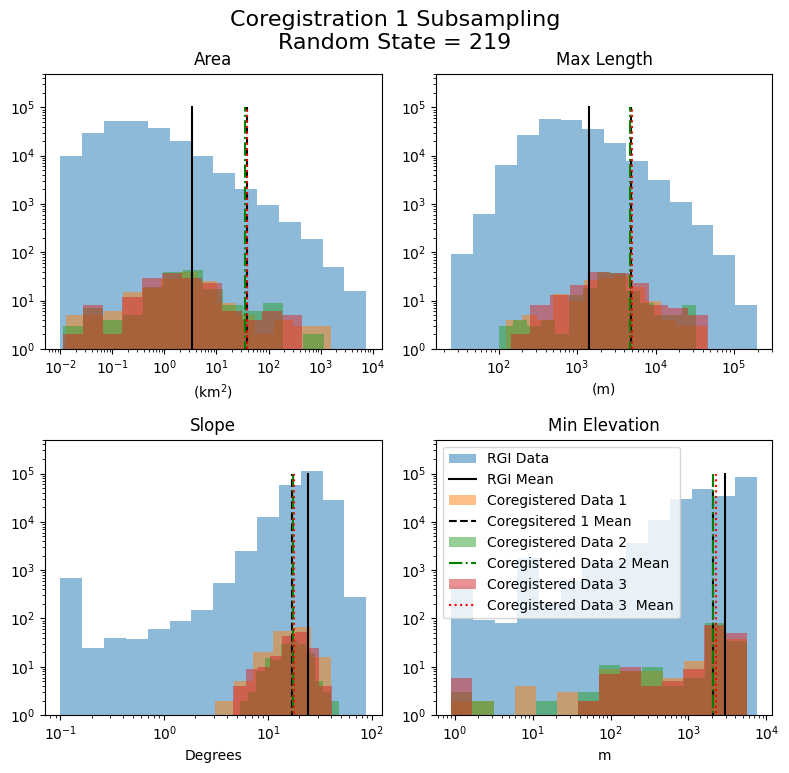

 25%|██▌       | 1/4 [00:02<00:08,  2.85s/it]

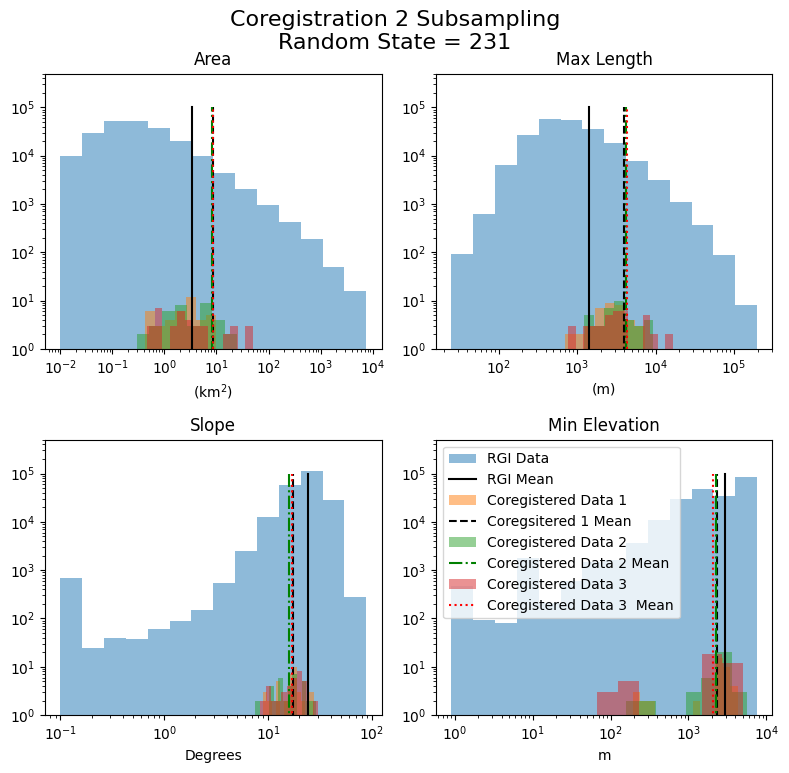

 50%|█████     | 2/4 [00:05<00:06,  3.02s/it]

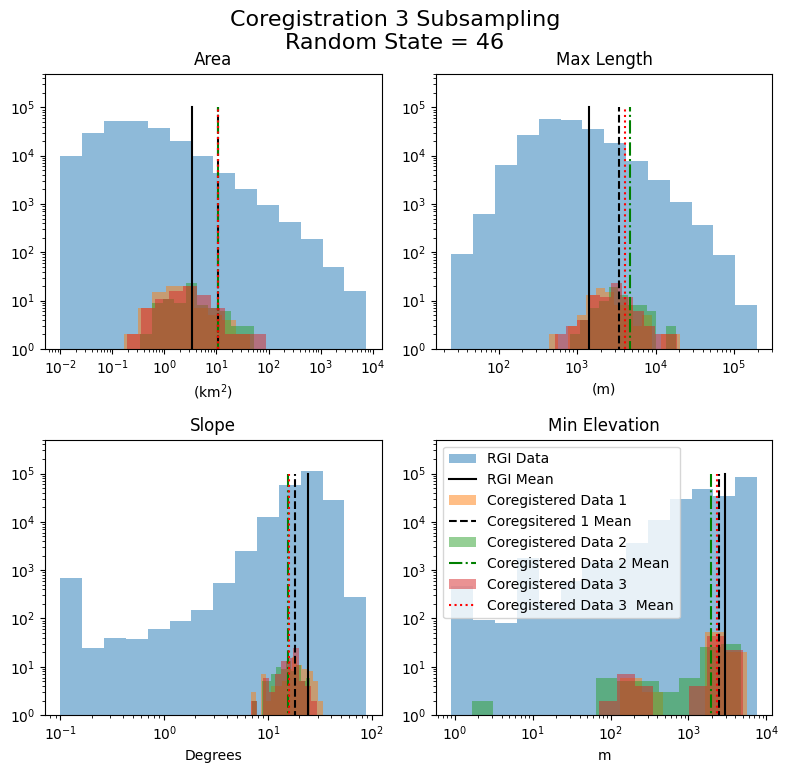

 75%|███████▌  | 3/4 [00:08<00:02,  2.95s/it]

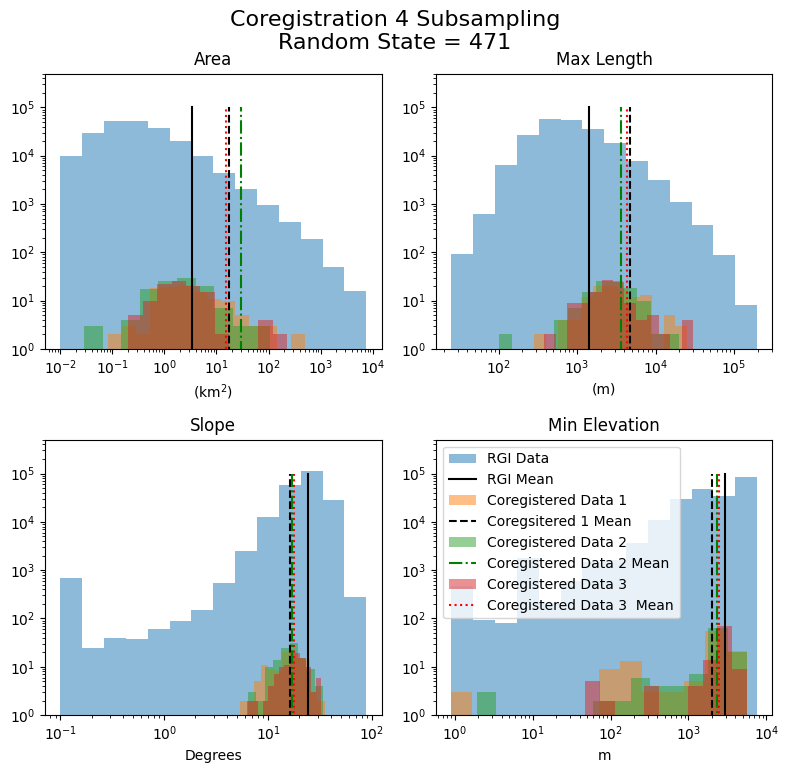

100%|██████████| 4/4 [00:11<00:00,  2.99s/it]


In [8]:
trfeats = {}
tefeats = {}
trlabs = {}
telabs = {}
rgi = gl.load_RGI()

for c in tqdm(range(1,5,1)):
    if c == 1:
        rs = 219
    if c == 2:
        rs = 231
    if c == 3:
        rs = 46
    if c == 4:
        rs = 471
    p = str(c)
    train = gl.coregister_data(p)
#     if c == 4:
#         train = train.drop(train[train['Thickness'] >= 300].index)
#         train = train.drop(train[train['Thickness'] == 267].index)
#         train = train.drop(train[train['Thickness'] == train['Thickness'].min()].index)
    
    
    df_sampler = train.copy()
    df_trainer = train.copy()
    df_1 = df_sampler.sample(frac = 0.333333333, random_state = rs)
    df_sampler = df_sampler.drop(df_1.index)

    df_2 = df_sampler.sample(frac = 0.5,random_state = rs)
    df_sampler = df_sampler.drop(df_2.index)

    df_3 = df_sampler
    
#     df_1 = df_trainer.drop(df1test.index)
#     df_2 = df_trainer.drop(df2test.index)
#     df_3 = df_trainer.drop(df3test.index)


    df_list = [df_1,df_2,df_3]
    for n,df in enumerate(df_list):
        trfeats[n], tefeats[n], trlabs[n], telabs[n] = gl.split_data(df,rs)

    feat_list = ['Area','Lmax','Slope','Zmin']
    fig = plt.figure(figsize = (8,8))
    for n,i in (enumerate(feat_list)):
        ax = plt.subplot(2,2,n+1)
        a = rgi[i]
        x = df_1[i]
        y = df_2[i]
        z = df_3[i]
        y[(y == -999)] = 0
        y[(y == -9)] = 25
        z[(z == -999)] = 0
        z[(z == -9)] = 25
        a[(a == -9)] = 25
        a[(a == -999)] = 0
        rmean = x.mean()
        tmean = y.mean()
        vmean = z.mean()
        fmean = a.mean()
        if i == 'Area':
            ax.set_title(i)
            ax.set_xlabel('(km$^2$)')
        if i == 'Lmax':
            ax.set_xlabel('(m)')
            ax.set_title('Max Length')
        if i == 'Slope':
            ax.set_title(i)
            ax.set_xlabel('Degrees')
            a = a + 0.1
            x = x + 0.1
            y = y + 0.1
            z = z + 0.1

        if i == 'Zmin':
            ax.set_xlabel('m')
            ax.set_title('Min Elevation')
            x = x + 0.9
            y = y + 0.9
            z = z + 0.9
            a = a + 0.9


        plt.hist(
            a, 
            bins=np.logspace(np.log10(a.min()), np.log10(a.max()), 15), 
            log = True, label = 'RGI Data',alpha = 0.5
        )
        plt.plot(
            (fmean,fmean),
            (0,1e5),
            c = 'k',
            linestyle = 'solid',
            label = 'RGI Mean'
        )



        plt.hist(
            x, 
            bins=np.logspace(np.log10(x.min()), np.log10(x.max()), 15), 
            log = True, label = 'Coregistered Data 1',alpha = 0.5
        )
        plt.plot(
            (rmean,rmean),
            (0,1e5),
            c = 'k',
            linestyle = 'dashed',
            label = 'Coregsitered 1 Mean'
        )




        plt.hist(
            y, 
            bins=np.logspace(np.log10(y.min()), np.log10(y.max()), 15), 
            log = True, label = 'Coregistered Data 2',alpha = 0.5
        )
        plt.plot(
            (tmean,tmean),
            (0,1e5),
            c = 'g',
            linestyle = 'dashdot',
            label = 'Coregistered Data 2 Mean'
        )


        plt.hist(
            z, 
            bins=np.logspace(np.log10(z.min()), np.log10(z.max()), 15), 
            log = True, label = 'Coregistered Data 3',alpha = 0.5
        )
        plt.plot(
            (vmean,vmean),
            (0,1e5),
            c = 'r',
            linestyle = 'dotted',
            label = 'Coregistered Data 3  Mean'
        )

        plt.ylim((1e0,500000))
    #             ax.set_title(i)
        plt.loglog()



    plt.suptitle(
         'Coregistration ' +
        p + ' Subsampling' + '\nRandom State = ' + str(rs), 
         fontsize = 16, y = .96
    )
    plt.legend(loc = 'upper left',
    #             bbox_to_anchor=(0,0,1,2.1)
    )


    plt.tight_layout()
    plt.show()

In [9]:
rgi = gl.load_RGI()    
for c in tqdm(range(1,5,1)):
    if c == 1:
        rs = 219
    if c == 2:
        rs = 231
    if c == 3:
        rs = 46
    if c == 4:
        rs = 471
    p = str(c)
    train = gl.coregister_data(p)
#     if c == 4:
#         train = train.drop(train[train['Thickness'] >= 300].index)
#         train = train.drop(train[train['Thickness'] == 267].index)
#         train = train.drop(train[train['Thickness'] == train['Thickness'].min()].index)
    df_sampler = train.copy()
    df_trainer = train.copy()
    df1test = df_sampler.sample(frac = 0.333333333, random_state = rs)
    df_sampler = df_sampler.drop(df1test.index)

    df2test = df_sampler.sample(frac = 0.5,random_state = rs)
    df_sampler = df_sampler.drop(df2test.index)

    df3test = df_sampler
    
    df_1 = df_trainer.drop(df1test.index)
    df_2 = df_trainer.drop(df2test.index)
    df_3 = df_trainer.drop(df3test.index)
    
    df_list = [df_1,df_2,df_3]
    dictlist = {}
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df3 = pd.DataFrame()
    for n,df_train in enumerate(df_list):            
        for k in (range(0,500,1)):
            
            dfts = gl.sample_training_data(df_train,k)

            dictlist[k] = dfts
        df_temp = pd.DataFrame.from_dict({(i,j): dictlist[i][j] 
                                   for i in dictlist.keys()
                                   for j in dictlist[i].keys()},
                               orient='index')
        if n == 0:
            df1 = pd.concat([df1,df_temp])
        if n == 1:
            df2 = pd.concat([df2,df_temp])
        if n == 2:
            df3 = pd.concat([df3,df_temp])
    mean_area1 = []
    for i in range(0,500,1):
        mean_area1.append(df1.loc[i].T['Area']['mean'])

    mean_area2 = []
    for i in range(0,500,1):
        mean_area2.append(df2.loc[i].T['Area']['mean'])

    mean_area3 = []
    for i in range(0,500,1):
        mean_area3.append(df3.loc[i].T['Area']['mean'])

    ma1 = [abs(ele) for ele in mean_area1]
    ma2 = [abs(ele) for ele in mean_area3]
    ma3 = [abs(ele) for ele in mean_area3]

    ma1 = pd.DataFrame(ma1)
    ma2 = pd.DataFrame(ma2)
    ma3 = pd.DataFrame(ma3)

    ma = ma1 + ma2 + ma3

    rs = ma[0][ma[0] == min(ma[0])].index.tolist()[0]  
    print(f'Best random state for sub sampling coregistration {c} is {rs}')



 25%|██▌       | 1/4 [00:16<00:48, 16.07s/it]

Best random state for sub sampling coregistration 1 is 299


 50%|█████     | 2/4 [00:31<00:31, 15.92s/it]

Best random state for sub sampling coregistration 2 is 5


 75%|███████▌  | 3/4 [00:47<00:15, 15.92s/it]

Best random state for sub sampling coregistration 3 is 263


100%|██████████| 4/4 [01:03<00:00, 15.87s/it]

Best random state for sub sampling coregistration 4 is 67


  0%|          | 0/4 [00:00<?, ?it/s]

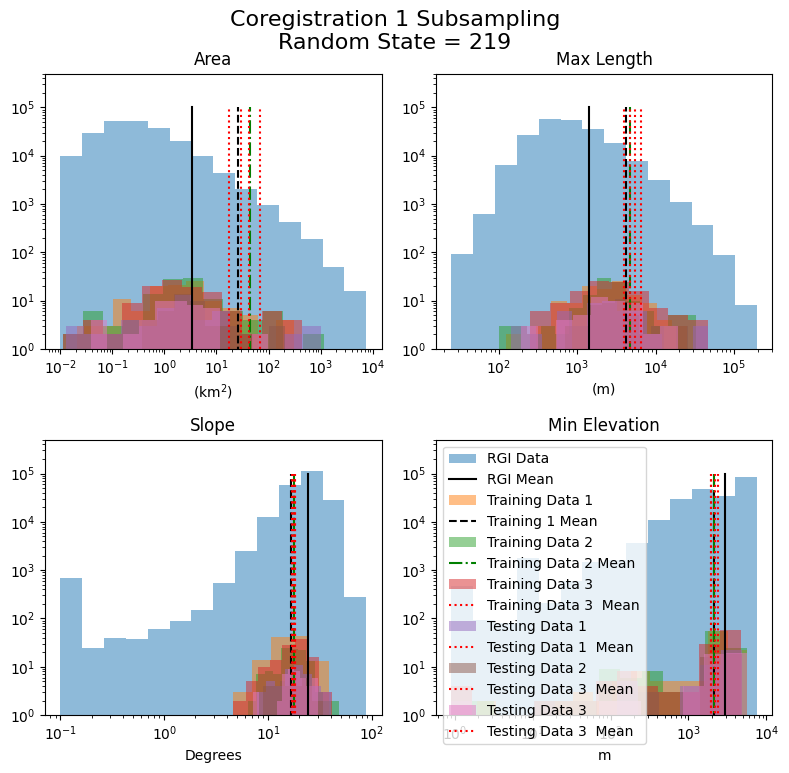

 25%|██▌       | 1/4 [00:03<00:09,  3.05s/it]

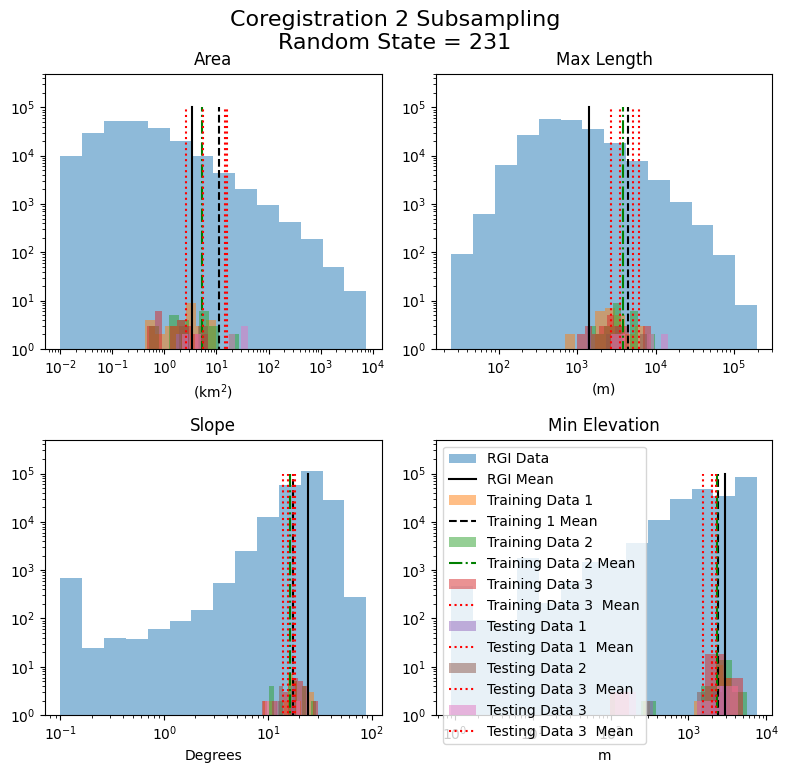

 50%|█████     | 2/4 [00:06<00:06,  3.22s/it]

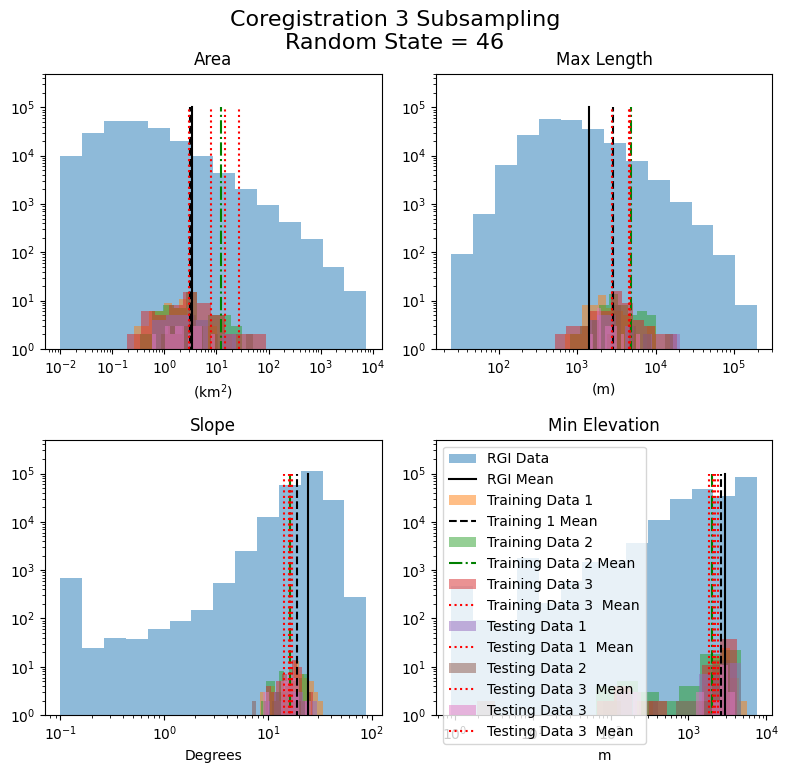

 75%|███████▌  | 3/4 [00:09<00:03,  3.15s/it]

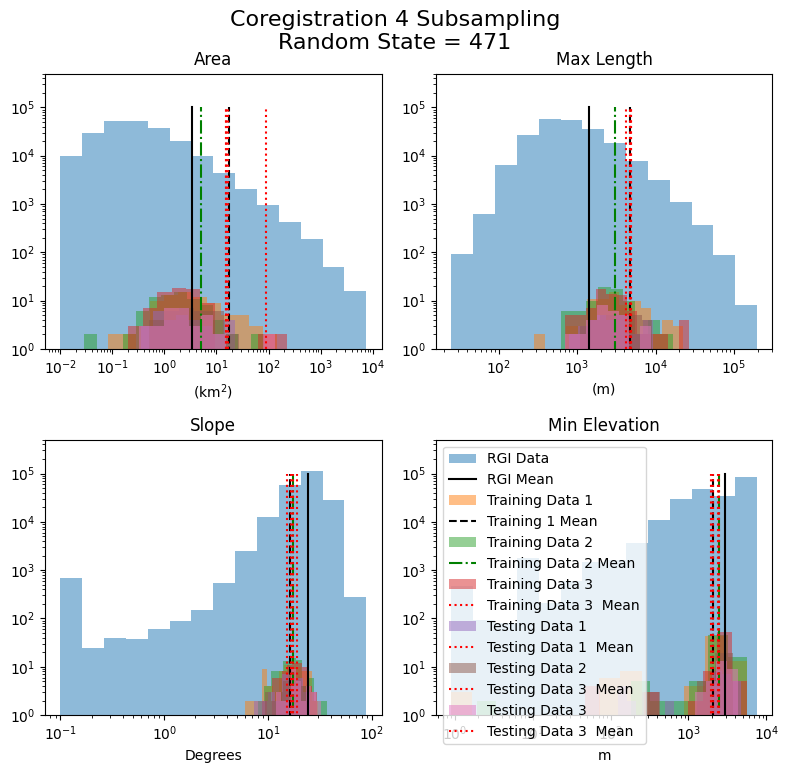

100%|██████████| 4/4 [00:12<00:00,  3.20s/it]


In [10]:
trfeats = {}
tefeats = {}
trlabs = {}
telabs = {}
rgi = gl.load_RGI()

for c in tqdm(range(1,5,1)):
    if c == 1:
        rs = 219
        rs2 = 299
    if c == 2:
        rs = 231
        rs2 = 5
    if c == 3:
        rs = 46
        rs2 = 263
    if c == 4:
        rs = 471
        rs2 = 401
    p = str(c)
    train = gl.coregister_data(p)
#     if c == 4:
#         train = train.drop(train[train['Thickness'] >= 300].index)
#         train = train.drop(train[train['Thickness'] == 267].index)
#         train = train.drop(train[train['Thickness'] == train['Thickness'].min()].index)
    
    
    df_sampler = train.copy()
    df_trainer = train.copy()
    df_1 = df_sampler.sample(frac = 0.333333333, random_state = rs)
    df_sampler = df_sampler.drop(df_1.index)

    df_2 = df_sampler.sample(frac = 0.5,random_state = rs)
    df_sampler = df_sampler.drop(df_2.index)

    df_3 = df_sampler
    
#     df_1 = df_trainer.drop(df1test.index)
#     df_2 = df_trainer.drop(df2test.index)
#     df_3 = df_trainer.drop(df3test.index)


    df_list = [df_1,df_2,df_3]
    for n,df in enumerate(df_list):
        trfeats[n], tefeats[n], trlabs[n], telabs[n] = gl.split_data(df,rs2)

    feat_list = ['Area','Lmax','Slope','Zmin']
    fig = plt.figure(figsize = (8,8))
    for n,i in (enumerate(feat_list)):
        ax = plt.subplot(2,2,n+1)
        a = rgi[i]
        x = trfeats[0][i]
        y = trfeats[1][i]
        z = trfeats[2][i]
        
        q = tefeats[0][i]
        r = tefeats[1][i]
        s = tefeats[2][i]
        y[(y == -999)] = 0
        y[(y == -9)] = 25
        r[r == -999] = 0
        r[r == -9] = 25
        s[s == -999] = 0
        s[s == -9] = 25
        z[(z == -999)] = 0
        z[(z == -9)] = 25
        a[(a == -9)] = 25
        a[(a == -999)] = 0
        
        
        
        
        rmean = x.mean()
        tmean = y.mean()
        vmean = z.mean()
        fmean = a.mean()
        
        qmean = q.mean()
        rrmean = r.mean()
        smean = s.mean()
        
        
        
        if i == 'Area':
            ax.set_title(i)
            ax.set_xlabel('(km$^2$)')
        if i == 'Lmax':
            ax.set_xlabel('(m)')
            ax.set_title('Max Length')
        if i == 'Slope':
            ax.set_title(i)
            ax.set_xlabel('Degrees')
            a = a + 0.1
            x = x + 0.1
            y = y + 0.1
            z = z + 0.1
            q = q + 0.1
            r = r + 0.1
            s = s + 0.1

        if i == 'Zmin':
            ax.set_xlabel('m')
            ax.set_title('Min Elevation')
            x = x + 0.9
            y = y + 0.9
            z = z + 0.9
            a = a + 0.9
            q = q + 0.9
            r = r + 0.9
            s = s + 0.9


        plt.hist(
            a, 
            bins=np.logspace(np.log10(a.min()), np.log10(a.max()), 15), 
            log = True, label = 'RGI Data',alpha = 0.5
        )
        plt.plot(
            (fmean,fmean),
            (0,1e5),
            c = 'k',
            linestyle = 'solid',
            label = 'RGI Mean'
        )



        plt.hist(
            x, 
            bins=np.logspace(np.log10(x.min()), np.log10(x.max()), 15), 
            log = True, label = 'Training Data 1',alpha = 0.5
        )
        plt.plot(
            (rmean,rmean),
            (0,1e5),
            c = 'k',
            linestyle = 'dashed',
            label = 'Training 1 Mean'
        )




        plt.hist(
            y, 
            bins=np.logspace(np.log10(y.min()), np.log10(y.max()), 15), 
            log = True, label = 'Training Data 2',alpha = 0.5
        )
        plt.plot(
            (tmean,tmean),
            (0,1e5),
            c = 'g',
            linestyle = 'dashdot',
            label = 'Training Data 2 Mean'
        )


        plt.hist(
            z, 
            bins=np.logspace(np.log10(z.min()), np.log10(z.max()), 15), 
            log = True, label = 'Training Data 3',alpha = 0.5
        )
        plt.plot(
            (vmean,vmean),
            (0,1e5),
            c = 'r',
            linestyle = 'dotted',
            label = 'Training Data 3  Mean'
        )
        
        plt.hist(
            q, 
            bins=np.logspace(np.log10(q.min()), np.log10(q.max()), 15), 
            log = True, label = 'Testing Data 1',alpha = 0.5
        )
        plt.plot(
            (qmean,qmean),
            (0,1e5),
            c = 'r',
            linestyle = 'dotted',
            label = 'Testing Data 1  Mean'
        )
        
        plt.hist(
            r, 
            bins=np.logspace(np.log10(r.min()), np.log10(r.max()), 15), 
            log = True, label = 'Testing Data 2',alpha = 0.5
        )
        plt.plot(
            (rrmean,rrmean),
            (0,1e5),
            c = 'r',
            linestyle = 'dotted',
            label = 'Testing Data 3  Mean'
        )
        plt.hist(
            s, 
            bins=np.logspace(np.log10(s.min()), np.log10(s.max()), 15), 
            log = True, label = 'Testing Data 3',alpha = 0.5
        )
        plt.plot(
            (smean,smean),
            (0,1e5),
            c = 'r',
            linestyle = 'dotted',
            label = 'Testing Data 3  Mean'
        )

        plt.ylim((1e0,500000))
    #             ax.set_title(i)
        plt.loglog()



    plt.suptitle(
         'Coregistration ' +
        p + ' Subsampling' + '\nRandom State = ' + str(rs), 
         fontsize = 16, y = .96
    )
    plt.legend(loc = 'upper left',
    #             bbox_to_anchor=(0,0,1,2.1)
    )


    plt.tight_layout()
    plt.show()

In [8]:
# trfeats = {}
# tefeats = {}
# trlabs = {}
# telabs = {}
# for c in tqdm(range(1,5,1)):
#     if c == 1:
#         rs = 219
#     if c == 2:
#         rs = 231
#     if c == 3:
#         rs = 46
#     if c == 4:
#         rs = 323
#     p = str(c)
#     train = gl.coregister_data(p)
#     rgi = gl.load_RGI()
    
    
#     df_sampler = train.copy()
#     df_trainer = train.copy()
#     df_1 = df_sampler.sample(frac = 0.333333333, random_state = k)
#     df_sampler = df_sampler.drop(df_1.index)

#     df_2 = df_sampler.sample(frac = 0.5,random_state = k)
#     df_sampler = df_sampler.drop(df_2.index)

#     df_3 = df_sampler
    
#     df_list = [df_1,df_2,df_3]
#     for n,df in enumerate(df_list):
#         trfeats[n], tefeats[n], trlabs[n], telabs[n] = gl.split_data(df,rs)

#     feat_list = ['Area','Lmax','Slope','Zmin']
#     fig = plt.figure(figsize = (10,10))
#     for n,i in (enumerate(feat_list)):
#         ax = plt.subplot(2,2,n+1)
#         a = rgi[i]
#         x = trfeats[0][i]
#         y = trfeats[1][i]
#         z = trfeats[2][i]
#         y[(y == -999)] = 0
#         y[(y == -9)] = 25
#         z[(z == -999)] = 0
#         z[(z == -9)] = 25
#         a[(a == -9)] = 25
#         a[(a == -999)] = 0
#         rmean = x.mean()
#         tmean = y.mean()
#         vmean = z.mean()
#         fmean = a.mean()
#         if i == 'Area':
#             ax.set_title(i)
#             ax.set_xlabel('(km$^2$)')
#         if i == 'Lmax':
#             ax.set_xlabel('(m)')
#             ax.set_title('Max Length')
#         if i == 'Slope':
#             ax.set_title(i)
#             ax.set_xlabel('Degrees')
#             a = a + 0.1
#             x = x + 0.1
#             y = y + 0.1
#             z = z + 0.1

#         if i == 'Zmin':
#             ax.set_xlabel('m')
#             ax.set_title('Min Elevation')
#             x = x + 0.9
#             y = y + 0.9
#             z = z + 0.9
#             a = a + 0.9


#         plt.hist(
#             a, 
#             bins=np.logspace(np.log10(a.min()), np.log10(a.max()), 15), 
#             log = True, label = 'RGI Data',alpha = 0.5
#         )
#         plt.plot(
#             (fmean,fmean),
#             (0,1e5),
#             c = 'k',
#             linestyle = 'solid',
#             label = 'RGI Mean'
#         )



#         plt.hist(
#             x, 
#             bins=np.logspace(np.log10(x.min()), np.log10(x.max()), 15), 
#             log = True, label = 'Coregistered Data 1',alpha = 0.5
#         )
#         plt.plot(
#             (rmean,rmean),
#             (0,1e5),
#             c = 'k',
#             linestyle = 'dashed',
#             label = 'Coregsitered 1 Mean'
#         )




#         plt.hist(
#             y, 
#             bins=np.logspace(np.log10(y.min()), np.log10(y.max()), 15), 
#             log = True, label = 'Coregistered Data 2',alpha = 0.5
#         )
#         plt.plot(
#             (tmean,tmean),
#             (0,1e5),
#             c = 'g',
#             linestyle = 'dashdot',
#             label = 'Coregistered Data 2 Mean'
#         )


#         plt.hist(
#             z, 
#             bins=np.logspace(np.log10(z.min()), np.log10(z.max()), 15), 
#             log = True, label = 'Coregistered Data 3',alpha = 0.5
#         )
#         plt.plot(
#             (vmean,vmean),
#             (0,1e5),
#             c = 'r',
#             linestyle = 'dotted',
#             label = 'Coregistered Data 3  Mean'
#         )

#         plt.ylim((1e0,500000))
#     #             ax.set_title(i)
#         plt.loglog()



#     plt.suptitle(
#          'Training Coregistration ' +
#         p + '\nTest / Train Random State = ' + str(rs), 
#          fontsize = 16, y = .96
#     )
#     plt.legend(loc = 'upper left',
#     #             bbox_to_anchor=(0,0,1,2.1)
#     )


#     plt.tight_layout()
#     plt.show()

In [9]:
# def make_frames():

#     for j in tqdm(range(1,5,1),leave = False):
#         p = str(j)

#         df = gl.load_notebook_data('4','first')

#         train = gl.coregister_data(p)

#         feat_list = ['Area','Lmax','Slope','Zmin']
#         fig = plt.figure(figsize = (10,10))
#         for n,i in (enumerate(feat_list)):
#             ax = plt.subplot(2,2,n+1)
#             x = df[i]
#             y = train[i]
#             y[(y == -999)] = 0
#             y[(y == -9)] = 25
#             rmean = x.mean()
#             tmean = y.mean()
#             if i == 'Area':
#                 ax.set_title(i)
#                 ax.set_xlabel('(km$^2$)')
#             if i == 'Lmax':
#                 ax.set_xlabel('(m)')
#                 ax.set_title('Max Length')
#             if i == 'Slope':
#                 ax.set_title(i)
#                 ax.set_xlabel('Degrees')
    
#                 x = x + 0.1
#                 y = y + 0.1
            
#             if i == 'Zmin':
#                 ax.set_xlabel('m')
#                 ax.set_title('Min Elevation')
#                 x = x + 0.9
#                 y = y + 0.9
#             plt.hist(
#                 x, 
#                 bins=np.logspace(np.log10(x.min()), np.log10(x.max()), 15), 
#                 log = True, label = 'RGI Data',
#             )
#             plt.plot(
#                 (rmean,rmean),
#                 (0,1e5),
#                 c = 'k',
#                 linestyle = '--',
#                 label = 'RGI Mean'
#             )
#             plt.hist(
#                 y, 
#                 bins=np.logspace(np.log10(y.min()), np.log10(y.max()), 15), 
#                 log = True, label = 'Training Data',
#             )
            

            
#             plt.plot(
#                 (tmean,tmean),
#                 (0,1e5),
#                 c = 'r',
#                 linestyle = '--',
#                 label = 'Training Mean'
#             )
            
#             plt.ylim((1e0,500000))
# #             ax.set_title(i)
#             plt.loglog()



#         plt.suptitle(
#              'Training Coregistration ' +
#             p, 
#              fontsize = 16, y = .96
#         )
#         plt.legend(loc = 'upper left',
# #             bbox_to_anchor=(0,0,1,2.1)
#         )

#         save_title = 'pop_sample_' + p

#         plt.savefig(f'img/img_{save_title}.png', 
#             transparent = False,  
#             facecolor = 'white'

#         )
#         plt.tight_layout()
#         plt.show()
    
# make_frames()
# #     plt.show()

        


# frames = []

# for k in range(1,5,1):
#     p = str(k)
#     save_title = 'pop_sample_' + p
#     image = imageio.v2.imread(f'img/img_{save_title}.png')
#     frames.append(image)
# imageio.mimsave('pop_sample_example.gif', # output gif
#             frames,          # array of input frames
#             duration = 3000,
#             loop = 10
#            )   